<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Chapter%203/Question%201/Q1_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
# Display basic information
print("Dimensions:", df.shape)
print("Sample size per species:\n", df['species'].value_counts())

Dimensions: (150, 5)
Sample size per species:
 species
0    50
1    50
2    50
Name: count, dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

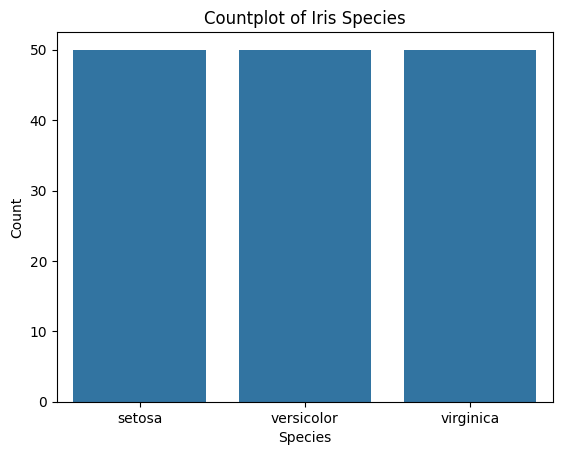

In [9]:
df_copy = df.copy(deep=True)
df_copy['species'] = df_copy['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.countplot(x='species', data=df_copy)
plt.title('Countplot of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

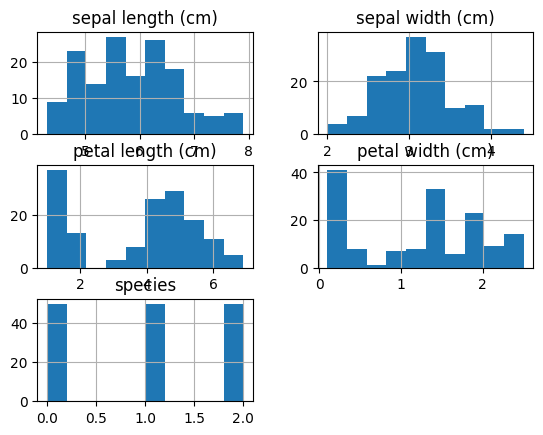

In [10]:
df.hist()

In [11]:
# Calculate statistical summaries
mean = df.mean()
variance = df.var()
correlation = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',  'petal width (cm)']].corr()

print("Mean:\n", mean)
print("Variance:\n", variance)
print("Correlation:\n", correlation)

Mean:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
species              1.000000
dtype: float64
Variance:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
species              0.671141
dtype: float64
Correlation:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


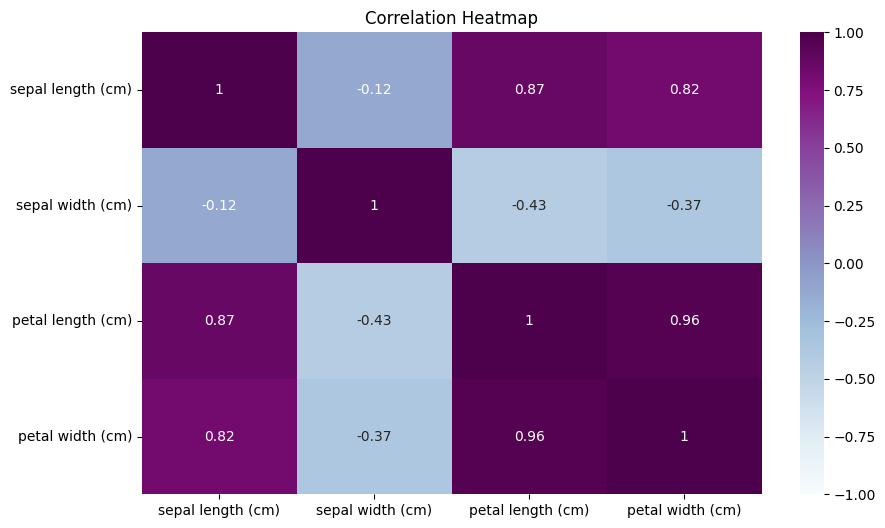

In [12]:
corr= df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

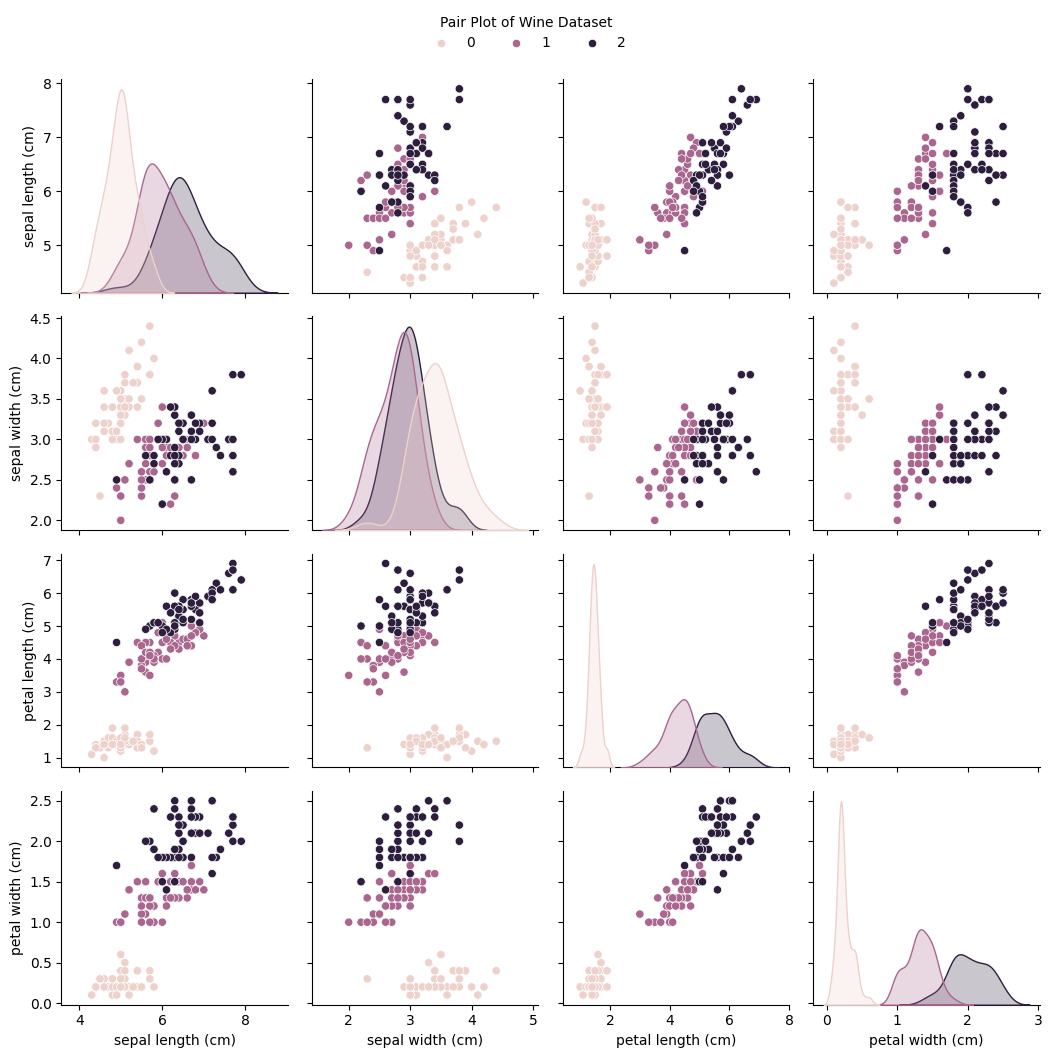

In [13]:
ax = sns.pairplot(df, hue='species')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5,1), ncol=3, title="Pair Plot of Wine Dataset", frameon=False)

plt.tight_layout()
plt.show()

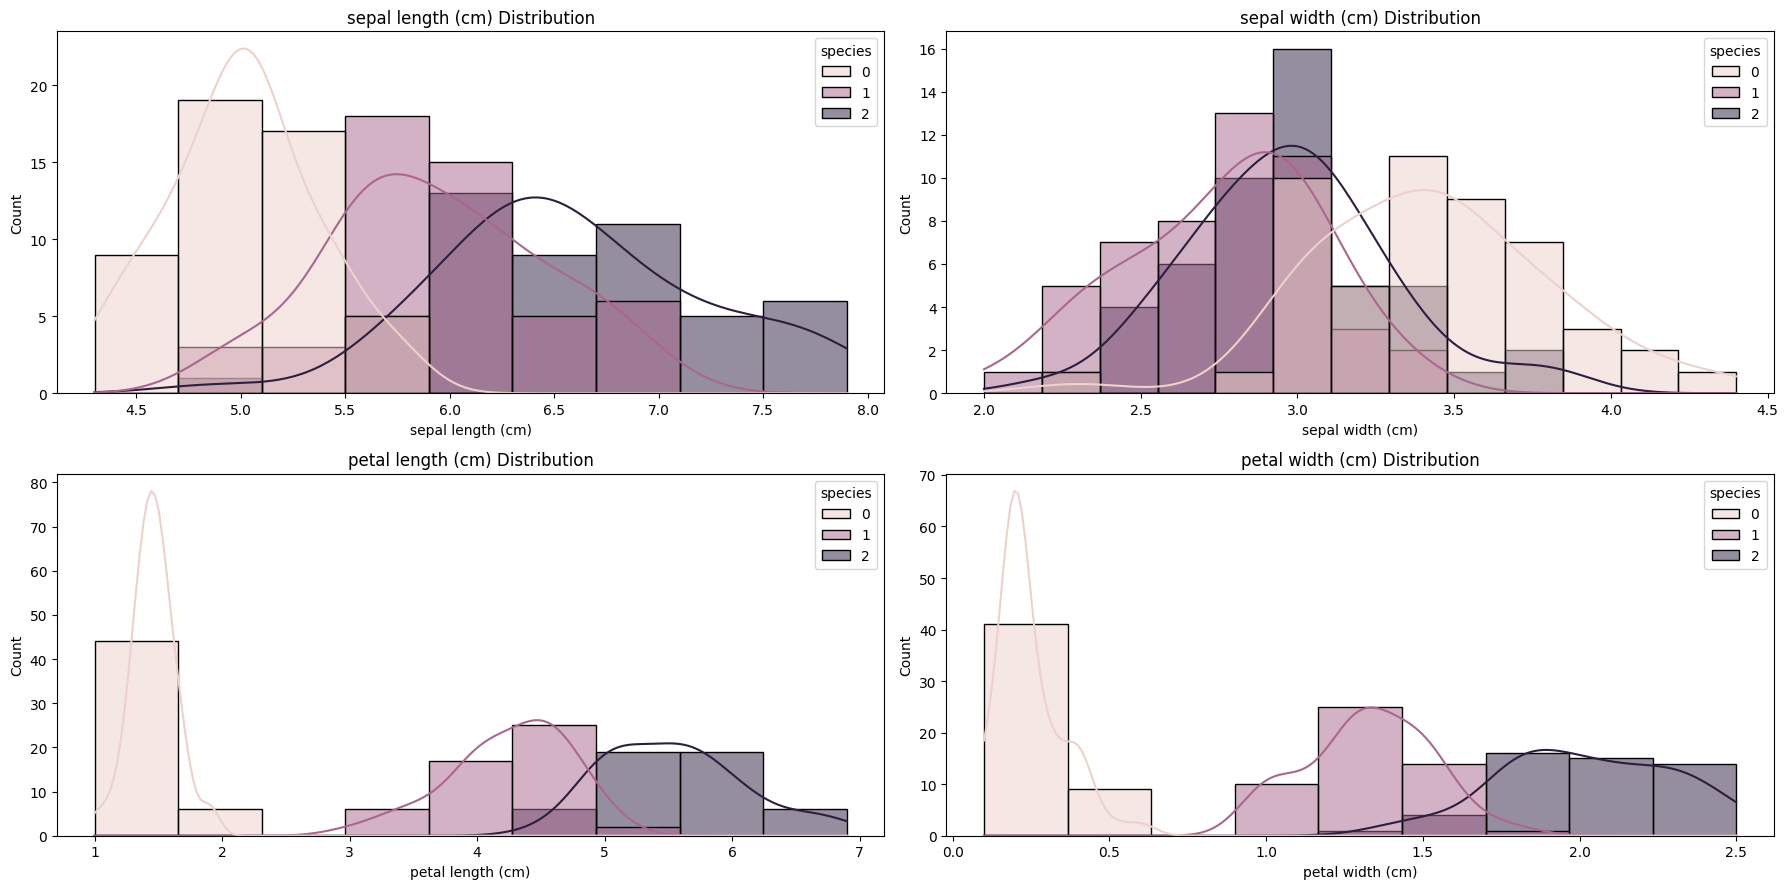

In [14]:
plt.figure(figsize=(18, 9))
for i, feature in enumerate (feature_names):
  plt.subplot(2, 2, i + 1)
  sns.histplot(data=df, x=feature, hue='species', kde=True)
  plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

In [15]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [16]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=76)
tsneData = model.fit_transform(X_train)

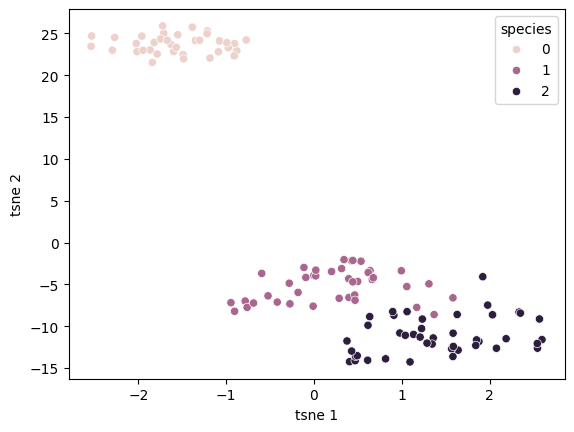

In [17]:
y_train1=pd.DataFrame(y_train, columns=['species'])

tsneDataFrame = pd.DataFrame(data = tsneData
                             , columns = ['tsne 1', 'tsne 2'])
tsneDataFrame.reset_index(drop=True, inplace=True)
y_train1.reset_index(drop=True, inplace=True)
y_train_df = pd.DataFrame(y_train1)
final_tsne_df = tsneDataFrame
final_tsne_df['species'] = y_train_df
ax = sns.scatterplot(x=final_tsne_df.iloc[:,0], y=final_tsne_df.iloc[:,1],
                     hue ='species',
                     data=final_tsne_df,
                     legend=True)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

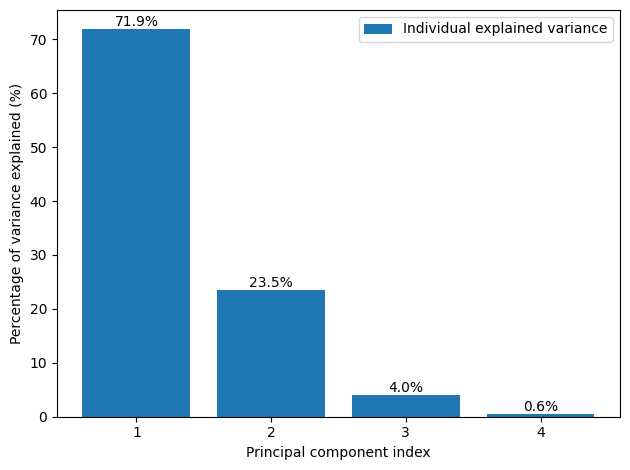

In [19]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
exp_var = []
# Sort the eigenvalues in descending order eigen_vals = np.sort(eigen_vals) [::-1]
for i in eigen_vals:
  var = (i / np.sum (eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 5), exp_var, align='center',
              label='Individual explained variance')

# Adding data labels to the top of bars
for i, bar in enumerate(bar):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%',
           ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list (range(1, 5)))
plt.legend (loc='best')
plt.tight_layout()

In [20]:
from sklearn.decomposition import PCA

pca = PCA (n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)
pca_df = pd.DataFrame (data = principalComponents
                       , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train2=pd.DataFrame(y_train, columns=['species'])
y_train2.reset_index (drop=True, inplace=True)
y_train2 = pd.DataFrame(y_train2)
final_pca_df = pca_df
final_pca_df['species'] = y_train2

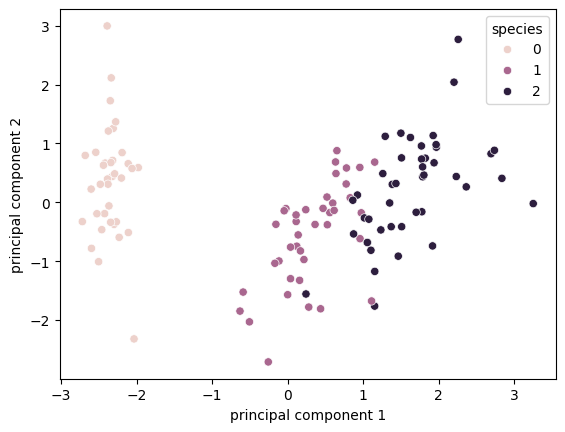

In [21]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
                     hue = 'species',
                     data=final_pca_df,
                     legend=True)
plt.show()

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda= lda.transform(X_test)

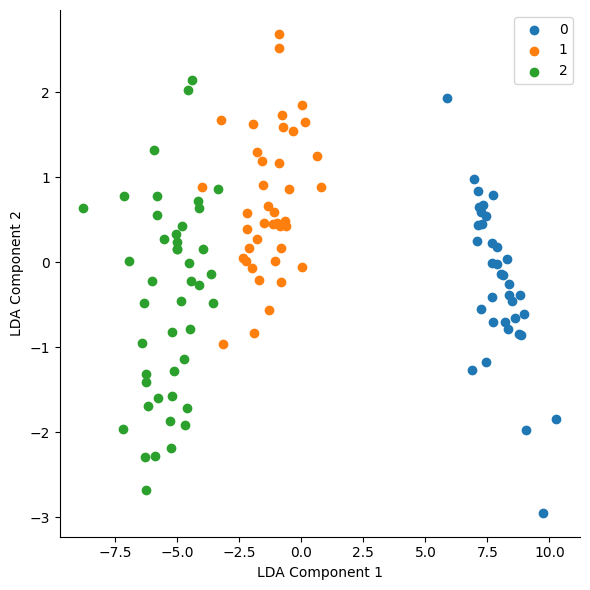

In [23]:
tmp_Df = pd.DataFrame (X_train_lda, columns=['LDA Component 1', 'LDA Component 2'])
tmp_Df['Class']=y_train
sns.FacetGrid(tmp_Df, hue ="Class",
              height=6).map(plt.scatter,
                            'LDA Component 1',
                            'LDA Component 2')
plt.legend (loc='upper right')

In [24]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=0.5,decision_function_shape='ovo')
clf.fit(X_train_lda, y_train)

SVC(C=0.5, decision_function_shape='ovo', kernel='linear')

In [25]:
print("Support vectors index:", clf.support_)
print("Number of support vectors:", clf.n_support_)
print("Support vectors:", clf.support_vectors_)

Support vectors index: [  7  15  34  53  95  98 113   1  40  75  81  96]
Number of support vectors: [1 6 5]
Support vectors: [[ 5.85860892  1.93592944]
 [-4.01795696  0.88102549]
 [-2.21995638  0.01360671]
 [-2.35468514  0.0470736 ]
 [-3.25183106  1.66730049]
 [-3.1439927  -0.96625126]
 [ 0.80042796  0.87981569]
 [-3.57505658 -0.47313884]
 [-3.97885069  0.15117968]
 [-3.34808536  0.86333038]
 [-4.42044683  2.14104586]
 [-3.65993004 -0.13940437]]


In [26]:
# Make predictions
y_pred = clf.predict(X_test_lda)

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.80      0.89        10
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
 [[14  0  0]
 [ 0  8  2]
 [ 0  0  6]]


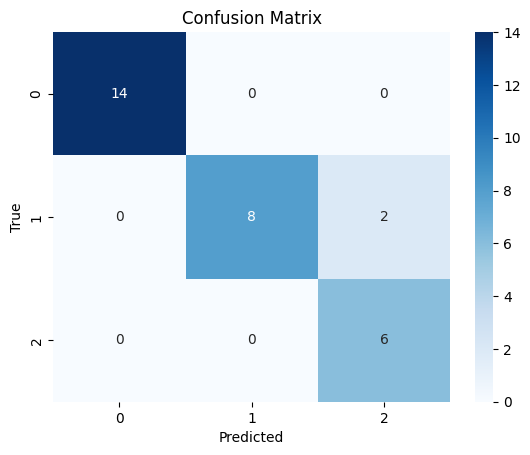

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    colors = ['r', 'g', 'b']
    for i, color in zip(range(3), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolors='k')
        w = model.coef_[i]
        b = model.intercept_[i]
        # At the decision boundary, w0*x0 + w1*x1 + b = 0
        # => x1 = -w0/w1 * x0 - b/w1
        x0 = np.linspace(x_min, x_max, 200)
        decision_boundary = (-(w[0]/w[1])* x0) - (b/w[1])

        margin = 1/w[1]
        #margin = 1/np.sqrt(np.sum(w**2))
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin

        plt.plot(x0, decision_boundary, '-', c=colors[i], linewidth=2)
        plt.plot(x0, gutter_up,  '--', c=colors[i], linewidth=2)
        plt.plot(x0, gutter_down, '--', c=colors[i], linewidth=2)

    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')

    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)

    plt.ylim([y_min,y_max])
    plt.title(f'{title} - Accuracy: {accuracy:.2f}')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(loc='best')
    plt.show()


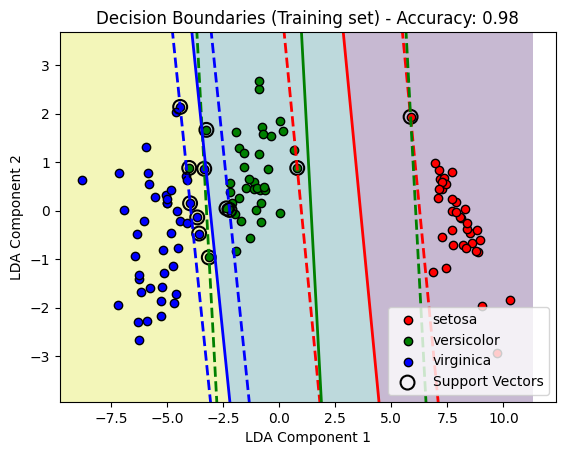

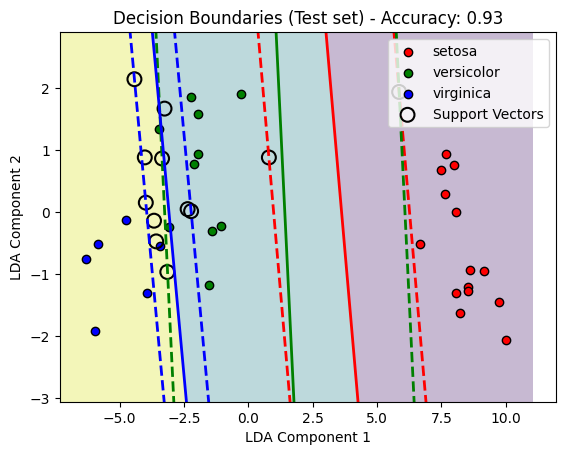

In [29]:
plot_decision_boundaries(X_train_lda, y_train, clf, "Decision Boundaries (Training set)")
plot_decision_boundaries(X_test_lda, y_test, clf, "Decision Boundaries (Test set)")

In [30]:
def visualize_multiclass_classification(X_train, y_train1,class_labels,trainset,model):

  for i, target_name in enumerate(class_labels):
    plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

  h = .02  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  k=np.arange(x_min, x_max, h)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  x_test = np.c_[xx.ravel(), yy.ravel()]
  Z = model.predict(x_test)
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  if trainset:
    plt.title('Data Points on Train Set')
  else:
    plt.title('Data Points on Test Set')


  plt.xlabel('LDA Component 1')
  plt.ylabel('LDA Component 2')
  plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
  plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)
  plt.show()


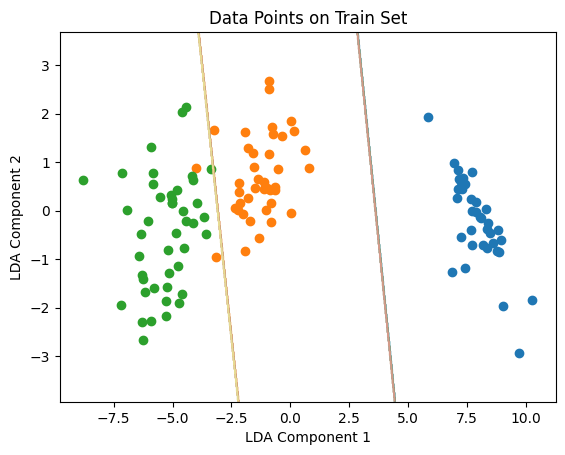

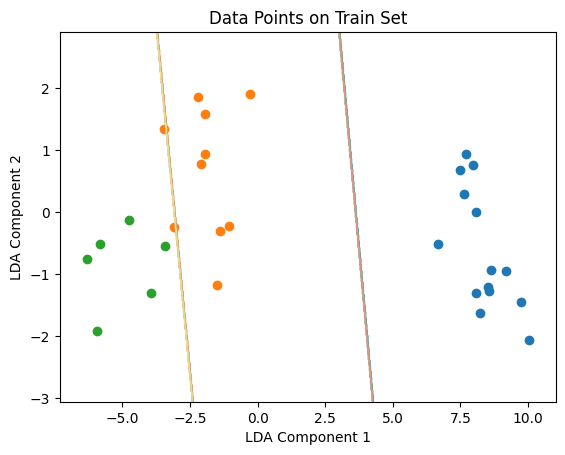

In [31]:
visualize_multiclass_classification(X_train_lda, y_train,iris.target,'True',clf)
visualize_multiclass_classification(X_test_lda, y_test,iris.target,'False',clf)

In [32]:
!pip install numpy matplotlib scikit-learn imageio

In [33]:
def plot_decision_boundary(X, y, model,degrees,trainset):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    colors = ['r', 'g', 'b']
    for i, color in zip(range(3), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], edgecolors='k')

    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')
    if trainset:
      plt.title(f'Data Points on Train Set-SVM with Polynomial Kernel Degree {degrees}')
    else:
      plt.title(f'Data Points on Test Set-SVM with Polynomial Kernel Degree {degrees}')

    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(loc='best')


In [34]:
import os

# Define the folder name
folder_name = "SupportVector"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd SupportVector

/content/SupportVector


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
import imageio

degrees = range(1, 11)
results = []
images_train = []
images_test = []
images_conf = []
# Train SVM with polynomial kernels of degree 1 to 10
for degree in degrees:
    clf1 = SVC(kernel='poly', degree=degree, random_state=76,decision_function_shape='ovo')
    clf1.fit(X_train_lda, y_train)
    y_pred = clf1.predict(X_test_lda)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results.append((degree, accuracy, report))
    print(f"Degree: {degree}\nAccuracy: {accuracy}\n{report}\n")

    plt.figure()
    plot_decision_boundary(X_train_lda, y_train, clf1,degree, True)

    filename1 = f'svm_degree_{degree}_train_support_vector.png'
    plt.savefig(filename1)
    images_train.append(imageio.imread(filename1))
    plt.close()

    plt.figure()
    plot_decision_boundary(X_test_lda, y_test, clf1,degree, False)

    filename2 = f'svm_degree_{degree}_test_support_vector.png'
    plt.savefig(filename2)
    images_test.append(imageio.imread(filename2))
    plt.close()

    # Visualize the results
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix{degree}')
    filename3 = f'svm_degree_{degree}_Confusion_Matrix.png'
    plt.savefig(filename3)
    images_conf.append(imageio.imread(filename3))
    plt.close()


# Path to save the GIF
gif_path_train = './svm_poly_degrees_train_support_vector.gif'
imageio.mimsave(gif_path_train, images_train, duration=10)
# Display the path to the GIF
print(f"GIF saved as {gif_path_train}")

# Path to save the GIF
gif_path_test = './svm_poly_degrees_test_support_vector.gif'
imageio.mimsave(gif_path_test, images_test, duration=10)
# Display the path to the GIF
print(f"GIF saved as {gif_path_test}")

# Path to save the GIF
gif_path_conf = './svm_poly_degrees_Confusion_Matrix.gif'
imageio.mimsave(gif_path_conf, images_conf, duration=10)
# Display the path to the GIF
print(f"GIF saved as {gif_path_conf}")

Degree: 1
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 2
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.91      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 3
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 4
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      1.00      0.91        10
           2       0.80      0.67      0.73         6

    accuracy                           0.90        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.90      0.90      0.90        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 5
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.94      0.89      0.90        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 6
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      1.00      0.91        10
           2       0.80      0.67      0.73         6

    accuracy                           0.90        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.90      0.90      0.90        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 7
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.94      0.89      0.90        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 8
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.77      1.00      0.87        10
           2       0.75      0.50      0.60         6

    accuracy                           0.87        30
   macro avg       0.84      0.81      0.81        30
weighted avg       0.87      0.87      0.86        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 9
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.77      1.00      0.87        10
           2       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.92      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


Degree: 10
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.77      1.00      0.87        10
           2       0.75      0.50      0.60         6

    accuracy                           0.87        30
   macro avg       0.84      0.81      0.81        30
weighted avg       0.87      0.87      0.86        30




<ipython-input-35-b5b81bbfe9fb>:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-35-b5b81bbfe9fb>:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))
<ipython-input-35-b5b81bbfe9fb>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_conf.append(imageio.imread(filename3))


GIF saved as ./svm_poly_degrees_train_support_vector.gif
GIF saved as ./svm_poly_degrees_test_support_vector.gif
GIF saved as ./svm_poly_degrees_Confusion_Matrix.gif


In [36]:
%cd ..

/content


In [37]:
def visualize_multiclass(X_train, y_train1,class_labels,trainset,model,degrees):

  for i, target_name in enumerate(class_labels):
    plt.scatter(X_train[y_train1 == i, 0], X_train[y_train1 == i, 1], label=target_name)

  h = .02  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  k=np.arange(x_min, x_max, h)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  x_test = np.c_[xx.ravel(), yy.ravel()]
  Z = model.predict(x_test)
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  if trainset:
    plt.title(f'Data Points on Train Set-SVM with Polynomial Kernel Degree {degrees}')
  else:
    plt.title(f'Data Points on Test Set-SVM with Polynomial Kernel Degree {degrees}')


  plt.xlabel('LDA Component 1')
  plt.ylabel('LDA Component 2')
  plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
  plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)


In [38]:
# Define the folder name
folder_name = "DecisionBoundary"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd DecisionBoundary

/content/DecisionBoundary


In [39]:
degrees = range(1, 11)
results = []
images_train = []
images_test = []

# Train SVM with polynomial kernels of degree 1 to 10
for degree in degrees:
    clf2 = SVC(kernel='poly', degree=degree, random_state=76,decision_function_shape='ovo')
    clf2.fit(X_train_lda, y_train)
    y_pred = clf2.predict(X_test_lda)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results.append((degree, accuracy, report))
    print(f"Degree: {degree}\nAccuracy: {accuracy}\n{report}\n")

    plt.figure()
    visualize_multiclass(X_train_lda, y_train,iris.target,True,clf2,degree)

    filename1 = f'svm_degree_{degree}_train.png'
    plt.savefig(filename1)
    images_train.append(imageio.imread(filename1))
    plt.close()

    plt.figure()
    visualize_multiclass(X_test_lda, y_test,iris.target,False,clf2,degree)

    filename2 = f'svm_degree_{degree}_test.png'
    plt.savefig(filename2)
    images_test.append(imageio.imread(filename2))
    plt.close()


# Path to save the GIF
gif_path_train = './svm_poly_degrees_train.gif'
imageio.mimsave(gif_path_train, images_train, duration=10)
# Display the path to the GIF
print(f"GIF saved as {gif_path_train}")

# Path to save the GIF
gif_path_test = './svm_poly_degrees_test.gif'
imageio.mimsave(gif_path_test, images_test, duration=10)
# Display the path to the GIF
print(f"GIF saved as {gif_path_test}")


Degree: 1
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 2
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.91      1.00      0.95        10
           2       0.83      0.83      0.83         6

    accuracy                           0.93        30
   macro avg       0.91      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 3
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 4
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      1.00      0.91        10
           2       0.80      0.67      0.73         6

    accuracy                           0.90        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.90      0.90      0.90        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 5
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.94      0.89      0.90        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 6
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.83      1.00      0.91        10
           2       0.80      0.67      0.73         6

    accuracy                           0.90        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.90      0.90      0.90        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 7
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.83      1.00      0.91        10
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.94      0.89      0.90        30
weighted avg       0.94      0.93      0.93        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 8
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.77      1.00      0.87        10
           2       0.75      0.50      0.60         6

    accuracy                           0.87        30
   macro avg       0.84      0.81      0.81        30
weighted avg       0.87      0.87      0.86        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 9
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.77      1.00      0.87        10
           2       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.92      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


Degree: 10
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.77      1.00      0.87        10
           2       0.75      0.50      0.60         6

    accuracy                           0.87        30
   macro avg       0.84      0.81      0.81        30
weighted avg       0.87      0.87      0.86        30




<ipython-input-39-3268b5233358>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_train.append(imageio.imread(filename1))
<ipython-input-39-3268b5233358>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_test.append(imageio.imread(filename2))


GIF saved as ./svm_poly_degrees_train.gif
GIF saved as ./svm_poly_degrees_test.gif


In [40]:
%cd ..

/content


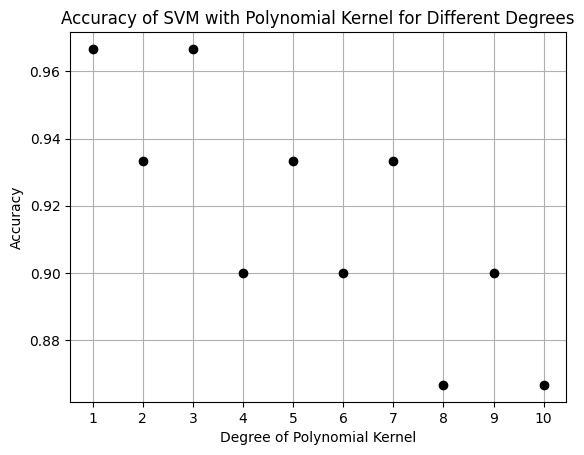

In [41]:
for i in degrees:
  # Plot the values against the custom indexes
  plt.plot(results[i-1][0], results[i-1][1], marker='o', color='k')

plt.title('Accuracy of SVM with Polynomial Kernel for Different Degrees')
plt.xlabel('Degree of Polynomial Kernel')
plt.ylabel('Accuracy')
plt.xticks(degrees)
plt.grid(True)
plt.grid(True)
plt.show()